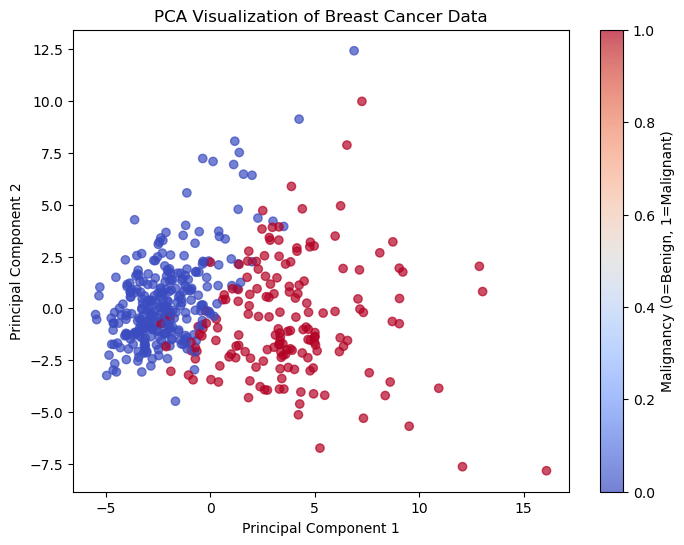

<Figure size 1200x800 with 0 Axes>

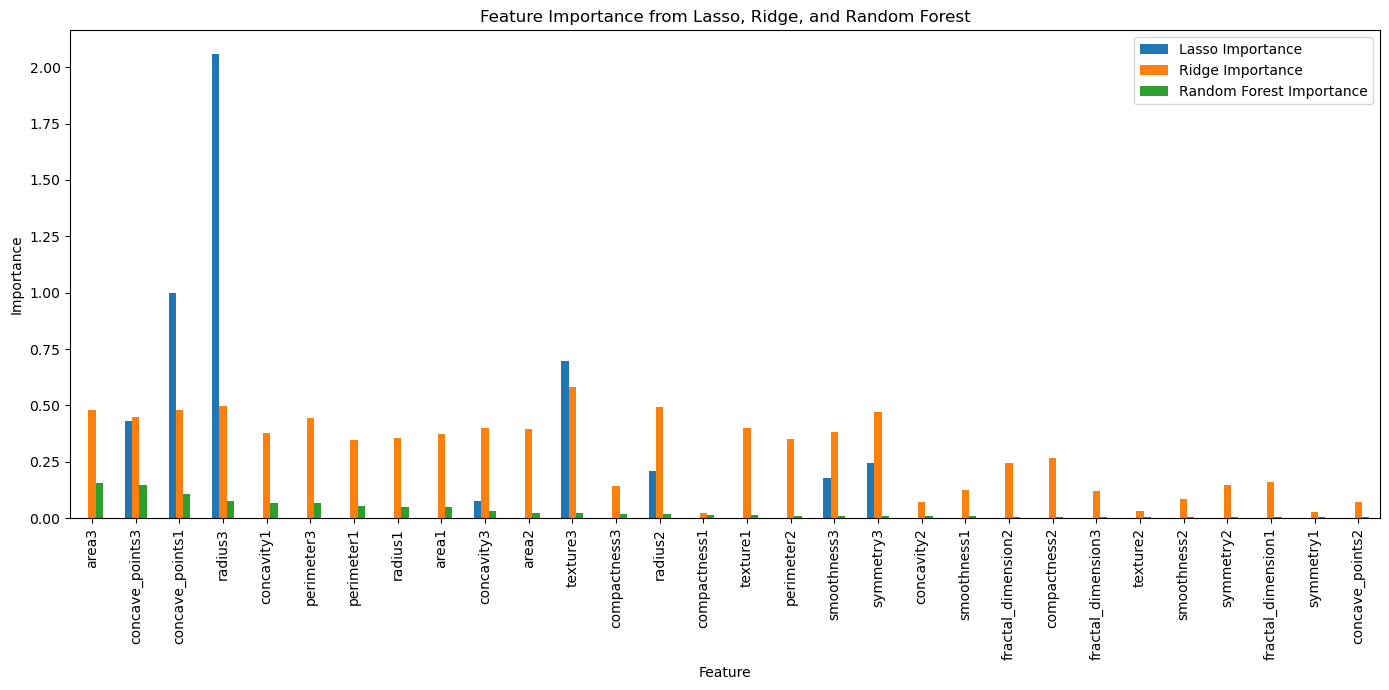

Lasso Regression Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Ridge Regression Classification Report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Random Forest Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro 

In [1]:
# Install the necessary library
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Load data
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Lasso (L1 regularization)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_importances = np.abs(lasso.coef_[0])

# Logistic Regression with Ridge (L2 regularization)
ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, C=0.1)
ridge.fit(X_train_scaled, y_train)
ridge_importances = np.abs(ridge.coef_[0])

# Random Forest for Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Map 'B' to 0 and 'M' to 1 for plotting
y_train_numeric = pd.Series(y_train).map({'B': 0, 'M': 1})

# Plotting PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric, cmap='coolwarm', alpha=0.7)
plt.title('PCA Visualization of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Malignancy (0=Benign, 1=Malignant)')
plt.show()

# Combine feature importance results
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Lasso Importance': lasso_importances,
    'Ridge Importance': ridge_importances,
    'Random Forest Importance': rf_importances
}).sort_values(by='Random Forest Importance', ascending=False)

# Visualization of Feature Importance
plt.figure(figsize=(12, 8))
importance_df.set_index('Feature').plot(kind='bar', figsize=(14, 7))
plt.title('Feature Importance from Lasso, Ridge, and Random Forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Model Performance Evaluation
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

print("Lasso Regression Classification Report:")
print(classification_report(y_test, y_pred_lasso))
print("\nRidge Regression Classification Report:")
print(classification_report(y_test, y_pred_ridge))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Save results to a CSV file
importance_df.to_csv('feature_importances.csv', index=False)
